In [2]:
import math
import matplotlib.pyplot as plt

In [65]:
# physics
Gravity = -9.81
AirDensity = 1.225
Mass = (4/3) * math.pow(0.05, 3) * math.pi * 2750 # Given a sphere with diameter of 10 cm and the density of granite
dt = 0.00001
P = [0] # Intial position
PDot = [0] # Initial velocity
PDotDot = [Gravity] # Initial acceleration

# Aerodynamics
Area = math.pow(0.05, 2) * math.pi # Area of a sphere of 10 cm
DragCoeff = 0.47 # Drag coefficient, 0.47 = Sphere

# Air properties
SpeedOfSound = 340.3 # Speed of sound at sea level and with 15 °C

# A discrete physics model to deterime the time for a stone dropped from a bridge, til it is percived by the person throwing the rock. The models uses backwards euler, without sub-step or anything other fance.

Time = [0]
PercivedTime = [0]
Index = 0

while PercivedTime[-1] < 4.87:

    Aerodynamic_Force = 0.5 * 1.225 * Area * DragCoeff * math.pow(PDot[-1],2)
    #Aerodynamic_Force = 0
    Aerodynamic_Acceleration = Aerodynamic_Force / Mass

    PDotDot.append(Gravity + Aerodynamic_Acceleration)
    PDot.append(PDot[-1] + PDotDot[-1] * dt)
    P.append(P[-1] + PDot[-1] * dt)

    PercivedTime.append(Time[-1] - P[-1] / SpeedOfSound)
    Time.append(Time[-1] + dt)
    Index += 1
print(Time[-1])


4.582389999995689


Text(0, 0.5, 'Position [m]')

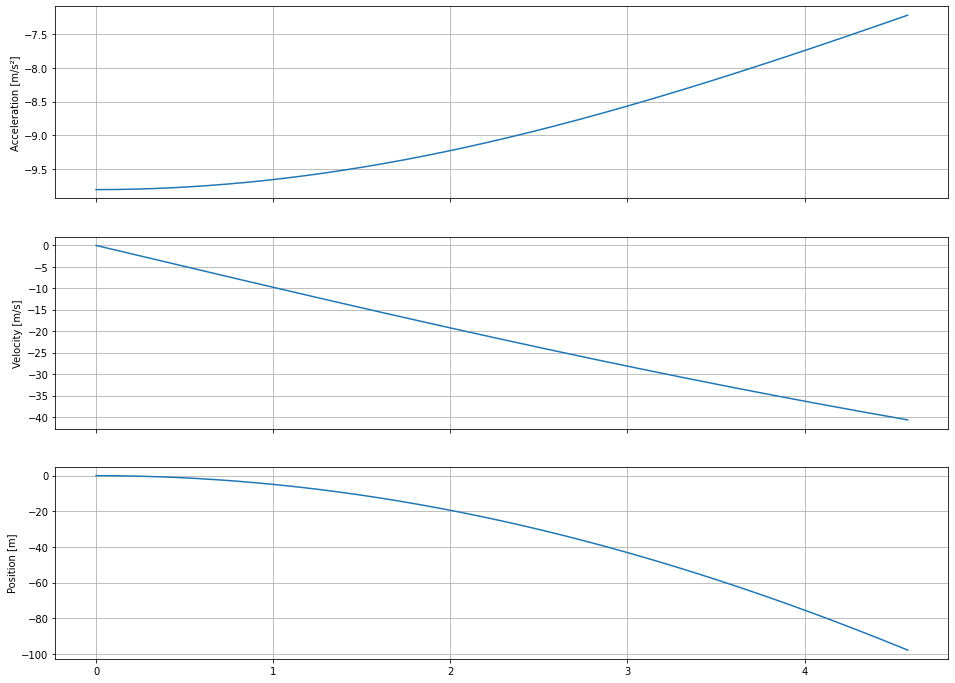

In [66]:
#---------- Generate plots----------- 
fig, axs = plt.subplots(3, 1, sharex=True, figsize=[16,12])

axs[0].plot(Time, PDotDot)
axs[0].grid()
axs[0].set_ylabel('Acceleration [m/s²]')

axs[1].plot(Time, PDot)
axs[1].grid()
axs[1].set_ylabel('Velocity [m/s]')

axs[2].plot(Time, P)
axs[2].grid()
axs[2].set_ylabel('Position [m]')
